In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
def Plot_Reg(n,degree=1,rep=30):
    RMSE_set = []
    EMSE_set = []
    np.random.seed(1)
    X_test = np.random.uniform(-2 * np.pi, 2 * np.pi, 50000)
    X_test_F = np.array([X_test ** i for i in np.arange(1, degree + 1, 1)]).T
    Y_test = np.sin(X_test) + np.cos(X_test)
    Pred_set = []
    for i in range(int(rep)):
        np.random.seed(i+1)
        X = np.random.uniform(-2 * np.pi, 2 * np.pi, n)
        epsilon = np.random.normal(0, 0.5, n)
        Y = np.sin(X) + np.cos(X) + epsilon
        X_fea = X.reshape(-1, 1)
        X_fea = np.concatenate([X_fea ** i for i in np.arange(1,degree+1,1)], 
axis=1)
        Model = LinearRegression()
        Model.fit(X_fea, Y)
        Pred_set.append(Model.predict(X_test_F))
        RMSE_set.append(np.mean((Model.predict(X_fea) - Y) ** 2))
        EMSE_set.append(np.mean((Model.predict(X_test_F) - Y_test) ** 2))
    Bias2 = round(np.mean((np.array(Pred_set).mean(axis=0) - Y_test)**2),4)
    Var = round(np.mean(np.var(np.array(Pred_set),axis=0)),4)
    return(round(np.mean(EMSE_set),4),Bias2,Var,Bias2+Var)

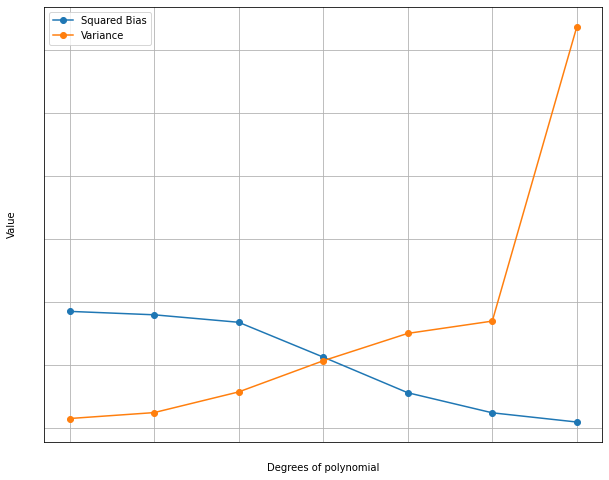

In [3]:
Bias_set = []
Var_set = []
for i in np.arange(1,8,1):
    A,B,C,D = Plot_Reg(30,degree=i,rep=1000)
    Bias_set.append(B)
    Var_set.append(C)
plt.figure(figsize=(10, 8))
plt.plot(np.arange(1,8,1),Bias_set,'-o',label='Squared Bias')
plt.plot(np.arange(1,8,1),Var_set,'-o',label='Variance')
plt.xlabel('Degrees of polynomial')
plt.ylabel('Value')
plt.tick_params(colors='white')
plt.legend()
plt.grid()